In [18]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error 
import numpy as np
import seaborn as sns 
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
import glob
from datetime import datetime
%matplotlib inline

In [19]:
#Loading data
dataframe = pd.read_csv('/content/Bangaluru Wind Generation.csv',index_col="DateTime")
dataframe.head()




,Air Temperature | ('c'),Pressure | (atm),Wind Speed | (m/s)\n(m/sec),Wind direction | (deg),Power generated by system | (kw)\n(kw)
DateTime,,,,,
01-01-2007 00:00,17.6,940.4,4.08,101,57.36
01-01-2007 01:00,17.9,941.4,4.74,114,89.54
01-01-2007 02:00,19.0,942.1,5.55,116,143.86
01-01-2007 03:00,20.6,942.4,6.04,113,184.45
01-01-2007 04:00,22.8,942.3,6.21,106,198.31


In [20]:
dataframe['Power generated by system | (kw)\n(kw)'].replace(0,np.nan, inplace=True)
dataframe['Power generated by system | (kw)\n(kw)'].fillna(method='ffill' , inplace=True)

In [21]:
#@title
''' Dividing data in test and train sets '''
dataset = dataframe.values
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

89174 38218


In [22]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back):
    a = dataset[i:(i + look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  print(len(dataY))
  return np.array(dataX), np.array(dataY)  

In [27]:
look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


89166
38210


In [28]:
''' Re-shaping data for model requirment '''
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [29]:
''' Fitting the data in LSTM Deep Learning model '''
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False)

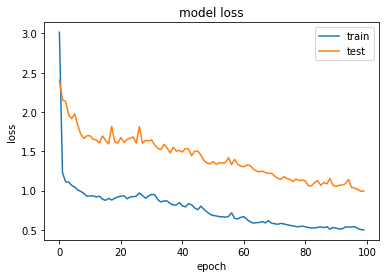

In [30]:
#summarize history for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc= 'upper right')
pyplot.show()

In [31]:
yhat = model.predict(testX)

1195/1195 [==============================] - 4s 2ms/step


In [34]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testY, yhat)))

Root mean squared error: 1.193


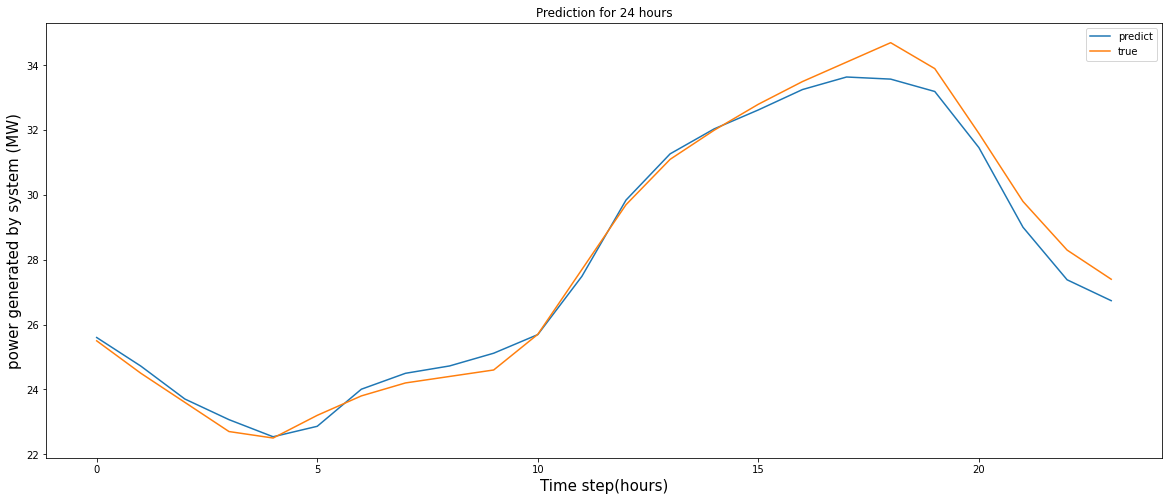

In [36]:
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:24], label= 'predict')
pyplot.plot(testY[:24], label='true')
pyplot.legend()
pyplot.title('Prediction for 24 hours')
pyplot.ylabel('power generated by system (MW)',size=15)
pyplot.xlabel('Time step(hours)',size=15)
pyplot.show()


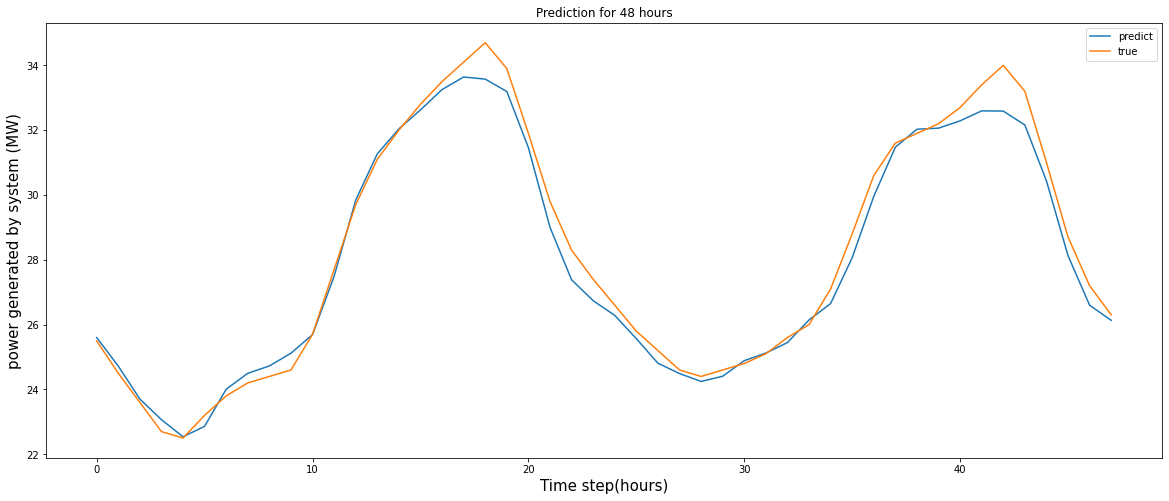

In [37]:
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:48], label= 'predict')
pyplot.plot(testY[:48], label='true')
pyplot.legend()
pyplot.title('Prediction for 48 hours')
pyplot.ylabel('power generated by system (MW)',size=15)
pyplot.xlabel('Time step(hours)',size=15)
pyplot.show()


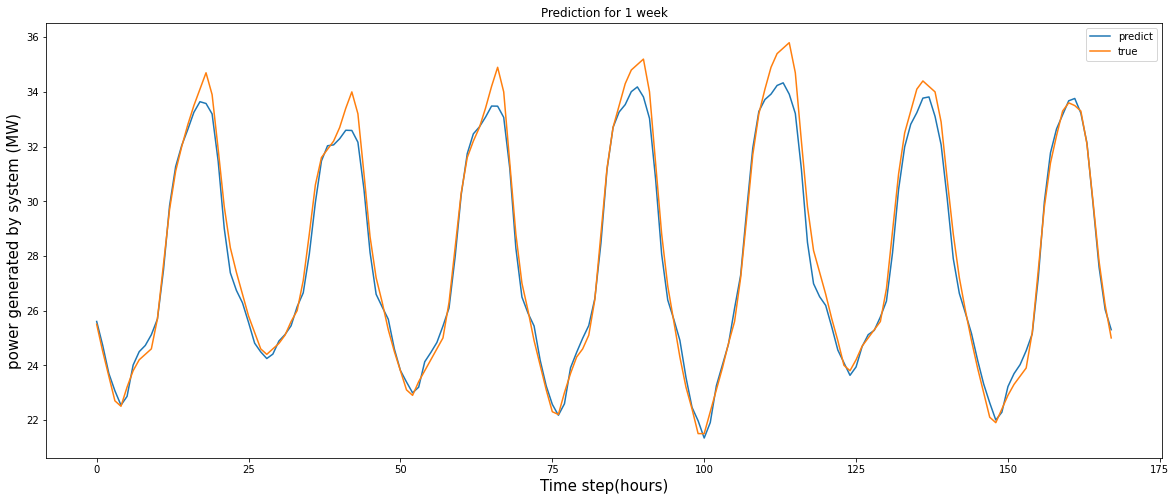

In [38]:
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:168], label= 'predict')
pyplot.plot(testY[:168], label='true')
pyplot.legend()
pyplot.title('Prediction for 1 week')
pyplot.ylabel('power generated by system (MW)',size=15)
pyplot.xlabel('Time step(hours)',size=15)
pyplot.show()


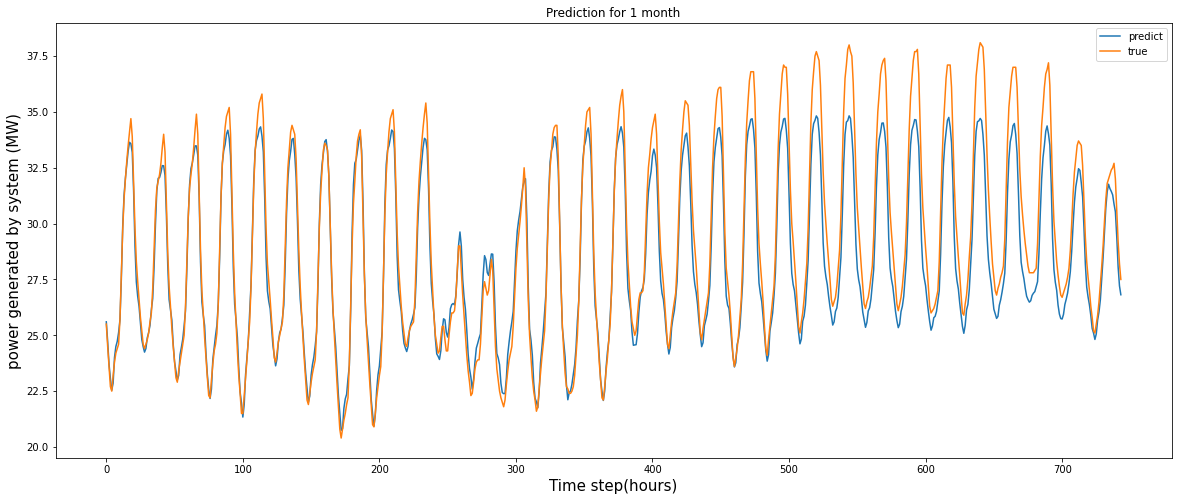

In [39]:
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:24*31], label= 'predict')
pyplot.plot(testY[:24*31], label='true')
pyplot.legend()
pyplot.title('Prediction for 1 month')
pyplot.ylabel('power generated by system (MW)',size=15)
pyplot.xlabel('Time step(hours)',size=15)
pyplot.show()
